## Generation of NPZ files for CARE projection training ##

Before training a CARE network, one needs to compress the training data set into a NPZ file. Then we will use this NPZ for training. Here is the code used to do so.

Firstly, we import all the functions we need. Note that no GPU is used for this task and that a folder HelperFunction has to be present in the parent folder.

In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import sys
sys.path.append("../HelperFunctions")
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#import cv2
from tifffile import imread
from csbdeep.utils import download_and_extract_zip_file, plot_some
from csbdeep.data import RawData, create_patches_reduced_target
from selectrawdata import SelectRawData

Using TensorFlow backend.


Here we will load the data to compose the training data set. It is composed of 3 folders:  
* One containing the raw images, 3D stacks of low illuminated samples;
* One containing the restored images, predictions of the high illumination of the raw images, using the already trained CARE restoration corresponding to the same microscope settings;
* One containing the groundtruth, 2D projections of the restored images 

The images in these 3 folders must have the exact same names.

In [2]:

raw_data = SelectRawData.Shuffle_from_folder(
    basepath    = '/run/user/1000/gvfs/smb-share:server=isiserver.curie.net,share=u934/equipe_bellaiche/l_sancere/Training_Data_Sets/Training_CARE_projection/MariaTraining_40x_bin2_Rfp/',
    source_dirs = ['Low','Restored'],
    target_dir  = 'GT',
    axes        = 'ZYX',
    pattern = '*'
    
)

Now we define the parameters for the NPZ generation. During the generation the images will be cropped, then we need to know the typical size of a crop giving enough context to the network for the training. For exemple, if we want the network to recognize human cells, the crop must includes one or several cells. 

The NPZ file will be generated in this cell and we define the path were the file will be saved. 

We define also the projection axis. `target_axes` will indicate the two axes kept and `reduction_axes` the axis we will loose after projection.  

In [3]:

patch_size = (17,128,128) # Normally: None,128,128

n_patches_per_image = 12

X, Y, XY_axes = create_patches_reduced_target (
    raw_data            = raw_data,
    patch_size          = patch_size, #for bin1 it is None 128 128 and for bin2 it is None 64 64
    n_patches_per_image = n_patches_per_image, #32 if patch size = (None, 64, 64)  
    target_axes         = 'YX',
    reduction_axes      = 'Z',
    save_file           = '/run/media/sancere/DATA/Lucas_NextonCreated_npz/MariaTraining_projection_40x_bin2_Rfp.npz',
)

 1466 raw images x    1 transformations   =  1466 images
 1466 images     x   12 patches per image = 17592 patches in total
Input data:
/run/user/1000/gvfs/smb-share:server=isiserver.curie.net,share=u934/equipe_bellaiche/l_sancere/Training_Data_Sets/Training_CARE_projection/MariaTraining_40x_bin2_Rfp/: target='GT', sources=['Low', 'Restored'], axes='ZYX', pattern='*'
Transformations:
1 x Broadcast target image to the shape of source
Patch size:
17 x 128 x 128


100%|██████████| 1466/1466 [2:09:48<00:00,  5.31s/it] 


Saving data to /run/media/sancere/DATA/Lucas_NextonCreated_npz/MariaTraining_projection_40x_bin2_Rfp.npz.


Here we save the config files of the NPZ, recording the parameters we used for the NPZ generation. 

In [5]:
ConfigNPZ = open("/run/media/sancere/DATA/Lucas_NextonCreated_npz/Parameters_Npz/ConfigNPZ_WideNewFiber1_Training_CARE_40x_bin1.txt", "w+") 
ConfigNPZ.write("patch_size = {} \n n_patches_per_image = {}".format(patch_size,n_patches_per_image))
ConfigNPZ.close() 

Plot some patches (crops) of Restored and Raw data.

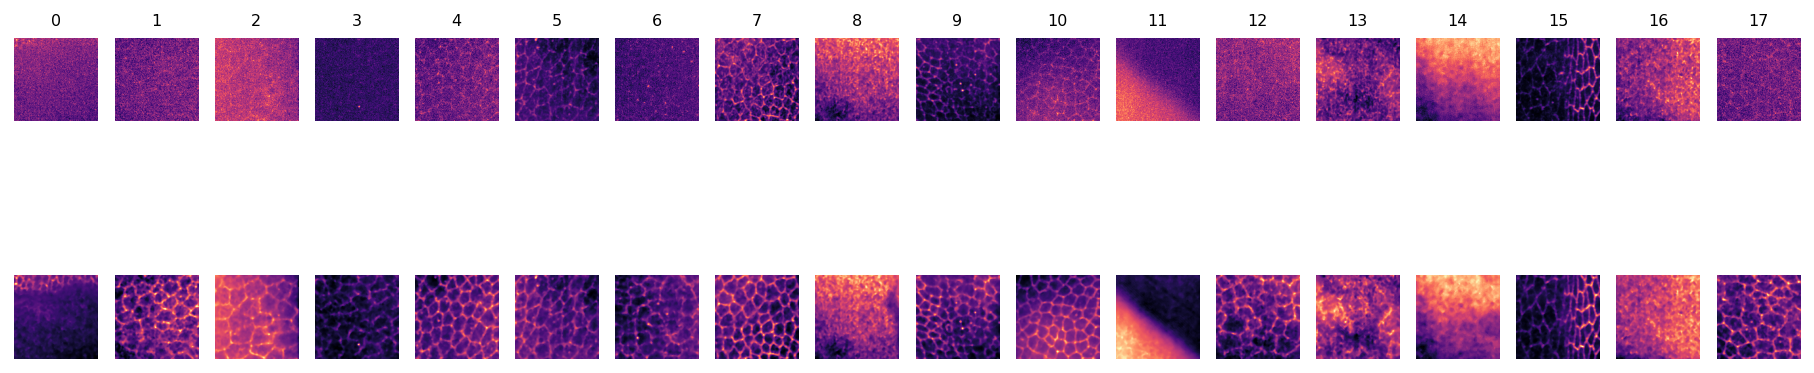

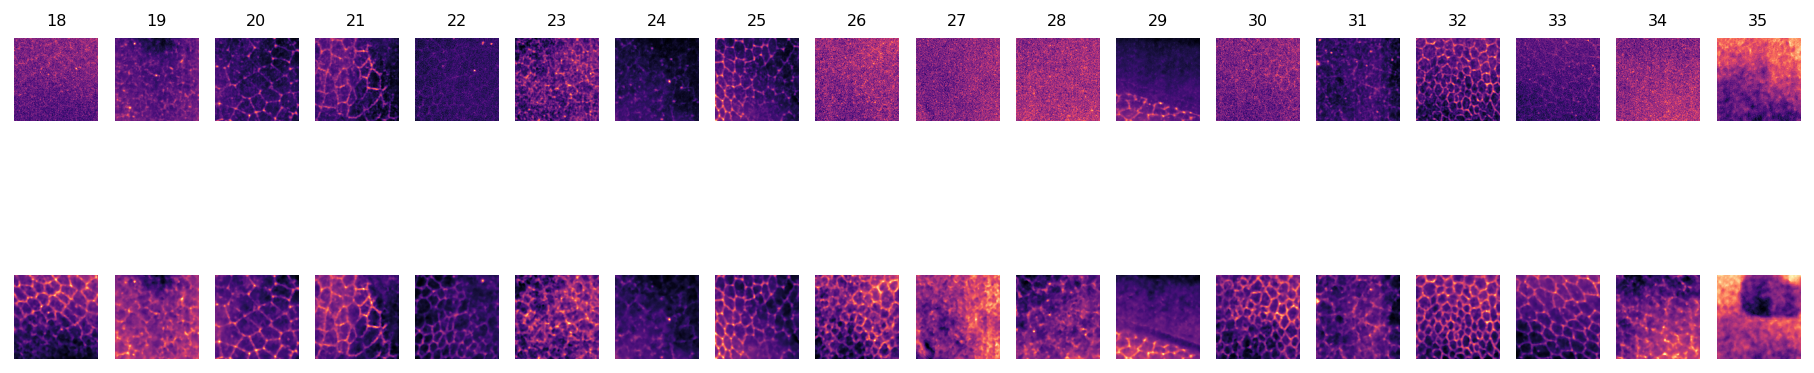

In [6]:
for i in range(2):
    plt.figure(figsize=(16,4))
    sl = slice(18*i, 18*(i+1)), 0
    plot_some(X[sl],Y[sl],title_list=[np.arange(sl[0].start,sl[0].stop)])
    plt.show()
None;